In [441]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib as m
from sklearn.model_selection import train_test_split
import csv
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import *
style.use("ggplot")
from sklearn import svm

In [442]:
df = pd.read_csv('svmdata.csv')
df.columns = ['a', 'b','class']
df.head()

,a,b,class
0,-0.83485,3.1362,1
1,0.77096,-1.8462,-1
2,-1.67440,2.8324,1
3,-3.30340,-1.5371,-1
4,-0.82117,4.6059,1


In [443]:
x=df.drop('class',axis=1)
y=df['class']

In [444]:
np.array(x)

array([[-0.83485,  3.1362 ],
       [ 0.77096, -1.8462 ],
       [-1.6744 ,  2.8324 ],
       ...,
       [-0.91129, -2.2253 ],
       [-4.622  ,  1.578  ],
       [-0.79659,  2.6337 ]])

In [445]:
y.head()

0    1
1   -1
2    1
3   -1
4    1
Name: class, dtype: int64

# Split

In [446]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)

# Plot train

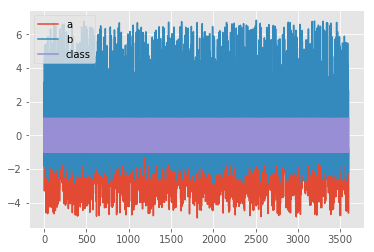

In [447]:
df.plot()

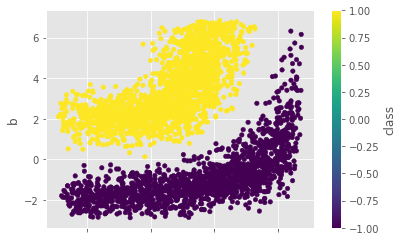

In [448]:
df.plot.scatter(x='a',
                y='b',
                c='class',
                colormap='viridis')

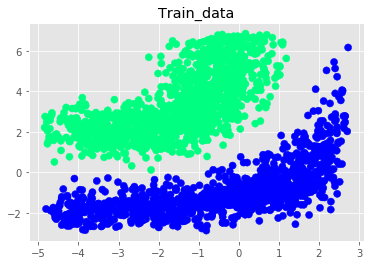

In [452]:
plt.scatter(X_train['a'], X_train['b'], c=y_train, s=50, cmap='winter')
plt.title('Train_data')
plt.savefig('train_plot.png')

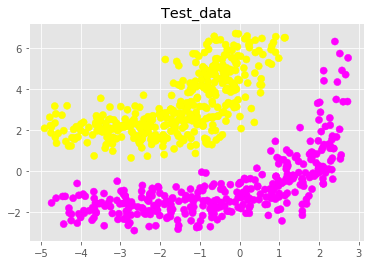

In [453]:
plt.scatter(X_test['a'], X_test['b'], c=y_test, s=50, cmap='spring')
plt.title('Test_data')
plt.savefig('test_plot.png')

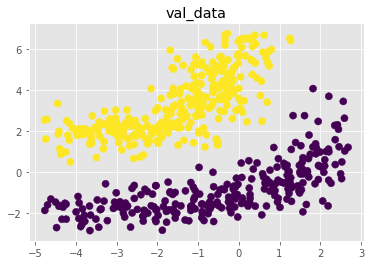

In [454]:
plt.scatter(X_val['a'], X_val['b'], c=y_val, s=50, cmap='viridis')
plt.title('val_data')
plt.savefig('val_plot.png')

# SVC

In [455]:
def rms_error(model, X, y):
    y_pred = model.predict(X)
    return np.sqrt(np.mean((y - y_pred) ** 2))


In [514]:
from sklearn import metrics

C=np.arange(0.01,1.5,0.2)
#for c in C:
print('C:',1)
clf1 = svm.LinearSVC(C = 1, class_weight=None, dual=True, fit_intercept=True,
                        intercept_scaling=1, loss='squared_hinge', max_iter=1000,
                        multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)
clf1.fit(X_train,y_train)
    
    
val_pred_1=clf1.predict(X_val)
test_pred_1=clf1.predict(X_test)
    
    
   # print('Error:',error)
  
val_accuracy = metrics.accuracy_score(val_pred_1,y_val)
test_accuracy = metrics.accuracy_score(test_pred_1,y_test)
    
    
      
val_prec= metrics.precision_score(val_pred_1,y_val)
test_prec = metrics.precision_score(test_pred_1,y_test)
    
    
      
val_recall = metrics.recall_score(val_pred_1,y_val)
test_recall = metrics.recall_score(test_pred_1,y_test)
    
    
print('val acc',val_accuracy)
print('test acc',test_accuracy)
print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
print('val prec:',val_prec)
print('test prec:',test_prec)
print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
print('val recall:',val_recall)
print('test recall:',test_recall)
print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
    
   
    
   # print('predicted class :',y_pred)
error=list()
   
train_errors=error
val_errors=error
test_errors=error
    
train_errors.append(rms_error(clf1,X_train,y_train))
val_errors.append(rms_error(clf1,X_val,y_val))
test_errors.append(rms_error(clf1,X_test,y_test))
    
    

print('train_error:',train_errors)
print('validation_error',val_errors)
print('test_error',test_errors)
 
print("*****************    ************************    ******************    **********************   **************************")

C: 1
val acc 0.9895833333333334
test acc 0.9791666666666666
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
val prec: 0.987220447284345
test prec: 0.9868421052631579
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
val recall: 0.9935691318327974
test recall: 0.974025974025974
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
train_error: [0.1909821042237691, 0.2041241452319315, 0.28867513459481287]
validation_error [0.1909821042237691, 0.2041241452319315, 0.28867513459481287]
test_error [0.1909821042237691, 0.2041241452319315, 0.28867513459481287]
*****************    ************************    ******************    **********************   **************************


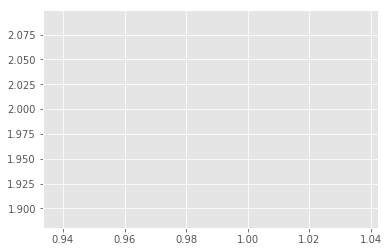

In [457]:
plt.plot(accuracies,c)

In [515]:
from sklearn.metrics import classification_report, confusion_matrix 

print("Confusion matrix:")
print(confusion_matrix(y_test, test_pred_1))  
print("*************************************************************************")
print(classification_report(y_test,test_pred_1))  

Confusion matrix:
[[330  10]
 [  5 375]]
*************************************************************************
             precision    recall  f1-score   support

         -1       0.99      0.97      0.98       340
          1       0.97      0.99      0.98       380

avg / total       0.98      0.98      0.98       720



In [516]:
X_val=np.array(X_val)
y_val=np.array(y_val)

X_test=np.array(X_test)
y_test=np.array(y_test)

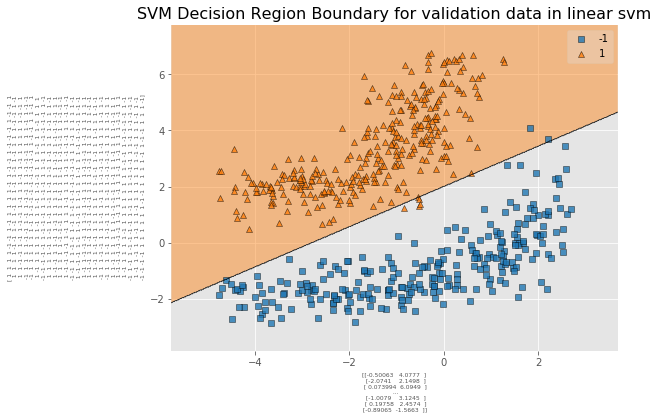

In [522]:
from mlxtend.plotting import plot_decision_regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(8,6))



plot_decision_regions(X=X_val, 
                      y=y_val,
                      clf=clf1)




# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X_val, size=6)
plt.ylabel(y_val, size=6)
plt.title('SVM Decision Region Boundary for validation data in linear svm', size=16)
plt.savefig('SVM Decision Region Boundary for validation data in linear svm.png')

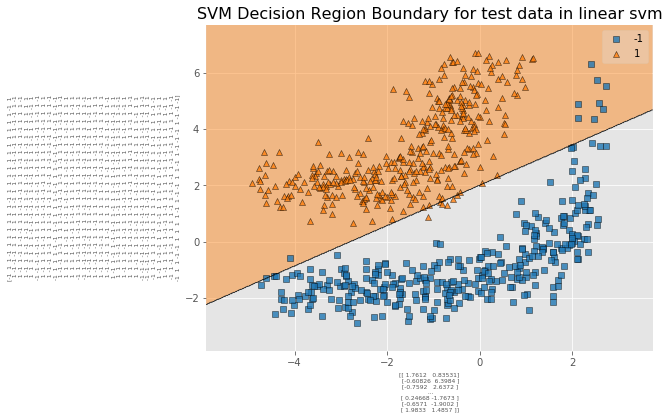

In [523]:
from mlxtend.plotting import plot_decision_regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(8,6))



plot_decision_regions(X=X_test, 
                      y=y_test,
                      clf=clf1)




# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X_test, size=6)
plt.ylabel(y_test, size=6)
plt.title('SVM Decision Region Boundary for test data in linear svm', size=16)
plt.savefig('SVM Decision Region Boundary for test data in linear svm.png')

# NonLinear_SVC

In [536]:
from sklearn.svm import SVC

#C=np.arange(0.01,1.5,0.2)
#for c in C:
print('C:',1)
clf2 = SVC(kernel='rbf',gamma=.01, C=1)
clf2.fit(X_train,y_train)
    
val_pred_2=clf2.predict(X_val)
test_pred_2=clf2.predict(X_test)
    
    
# print('Error:',error)
  
val_accuracy = metrics.accuracy_score(val_pred_2,y_val)
test_accuracy = metrics.accuracy_score(test_pred_2,y_test)
    
    
      
val_prec= metrics.precision_score(val_pred_2,y_val)
test_prec = metrics.precision_score(test_pred_2,y_test)
    
    
      
val_recall = metrics.recall_score(val_pred_2,y_val)
test_recall = metrics.recall_score(test_pred_2,y_test)
    
    
print('val acc',val_accuracy)
print('test acc',test_accuracy)
print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
print('val prec:',val_prec)
print('test prec:',test_prec)
print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
print('val recall:',val_recall)
print('test recall:',test_recall)
print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
    
   
    
   # print('predicted class :',y_pred)
error=list()
   
train_errors=error
val_errors=error
test_errors=error
    
train_errors.append(rms_error(clf2,X_train,y_train))
val_errors.append(rms_error(clf2,X_val,y_val))
test_errors.append(rms_error(clf2,X_test,y_test))
    
    

print('train_error:',train_errors)
print('validation_error',val_errors)
print('test_error',test_errors)
 
print("*****************    ************************    ******************    **********************   **************************")    


C: 1
val acc 1.0
test acc 1.0
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
val prec: 1.0
test prec: 1.0
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
val recall: 1.0
test recall: 1.0
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
train_error: [0.0416757118565413, 0.0, 0.0]
validation_error [0.0416757118565413, 0.0, 0.0]
test_error [0.0416757118565413, 0.0, 0.0]
*****************    ************************    ******************    **********************   **************************


In [537]:
from sklearn.metrics import classification_report, confusion_matrix 

print("Confusion matrix:")
print(confusion_matrix(y_test, test_pred_2))  
print("*************************************************************************")
print(classification_report(y_test,test_pred_2))  

Confusion matrix:
[[340   0]
 [  0 380]]
*************************************************************************
             precision    recall  f1-score   support

         -1       1.00      1.00      1.00       340
          1       1.00      1.00      1.00       380

avg / total       1.00      1.00      1.00       720



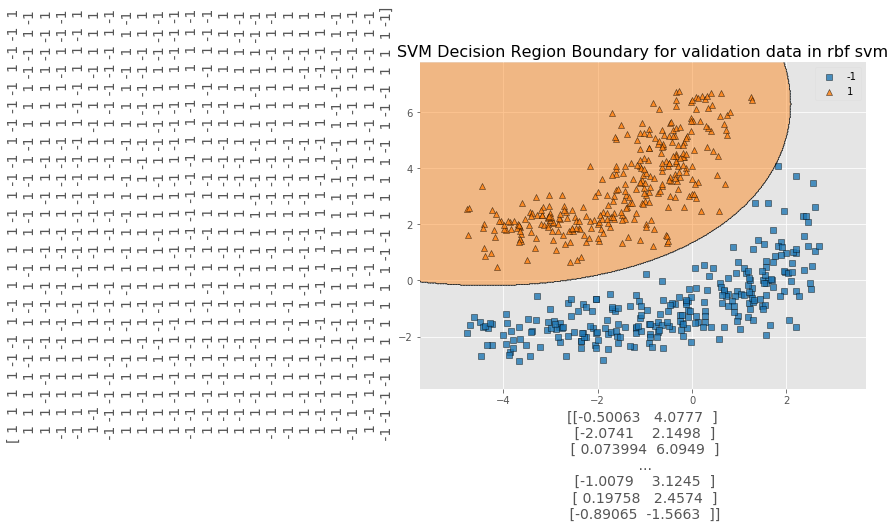

In [538]:
from mlxtend.plotting import plot_decision_regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(8, 6))



plot_decision_regions(X=X_val, 
                      y=y_val,
                      clf=clf2)




# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X_val, size=14)
plt.ylabel(y_val, size=14)
plt.title('SVM Decision Region Boundary for validation data in rbf svm', size=16)
plt.savefig('SVM Decision Region Boundary for validation data in rbf svm.png')

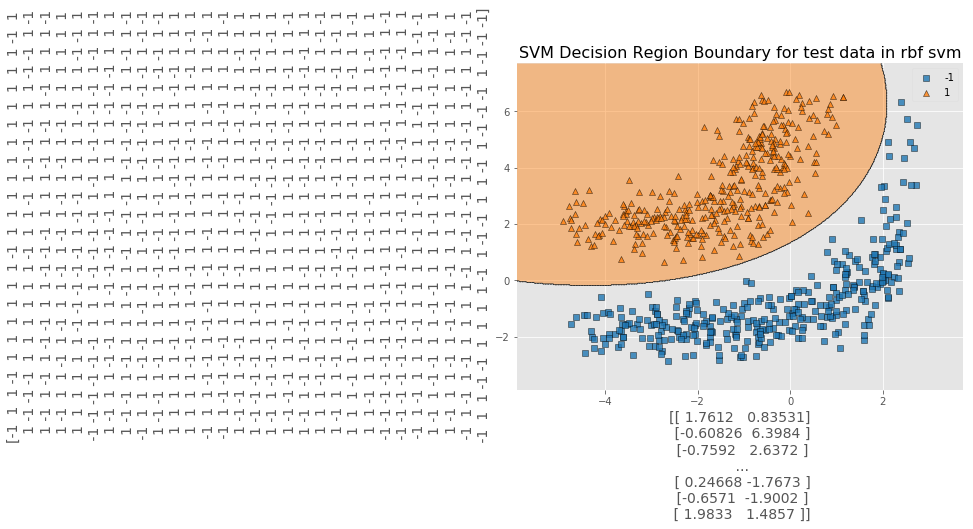

In [539]:
from mlxtend.plotting import plot_decision_regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(8, 6))



plot_decision_regions(X=X_test, 
                      y=y_test,
                      clf=clf2)




# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X_test, size=14)
plt.ylabel(y_test, size=14)
plt.title('SVM Decision Region Boundary for test data in rbf svm', size=16)
plt.savefig('SVM Decision Region Boundary for test data in rbf svm.png')

# grid search

In [422]:
from sklearn.grid_search import GridSearchCV

param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)


grid.fit(X_train,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ............................ C=1, gamma=1, kernel=linear -   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ............................ C=1, gamma=1, kernel=linear -   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ............................ C=1, gamma=1, kernel=linear -   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............................... C=1, gamma=1, kernel=rbf -   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............................... C=1, gamma=1, kernel=rbf -   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............................... C=1, gamma=1, kernel=rbf -   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ............................. C=1, gamma=0.1, kernel=rbf -   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ............................. C=1, gamma=0.1, kernel=rbf -   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ........................ C=1, gamma=0.001, kernel=linear -   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ........................ C=1, gamma=0.001, kernel=linear -   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ........................ C=1, gamma=0.001, kernel=linear -   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........................... C=1, gamma=0.001, kernel=rbf -   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........................... C=1, gamma=0.001, kernel=rbf -   0.0s
[CV] 

[CV] ..................... C=100, gamma=0.0001, kernel=linear -   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ........................ C=100, gamma=0.0001, kernel=rbf -   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ........................ C=100, gamma=0.0001, kernel=rbf -   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ........................ C=100, gamma=0.0001, kernel=rbf -   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ......................... C=1000, gamma=1, kernel=linear -   0.4s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ......................... C=1000, gamma=1, kernel=linear -   0.6s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ......................... C=1000, gamma=1, kernel=linear -   0.4s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    8.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [540]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [542]:
final_clf=SVC(kernel='rbf',gamma=1, C=1)
final_clf.fit(X_train,y_train)
final_y_pred=final_clf.predict(X_val)

In [543]:
val_predict = grid.predict(X_val)

print(classification_report(y_val,val_predict))
print(confusion_matrix(y_val, val_predict))
print("********************************************************")
print('val_error:', rms_error(final_clf,X_val,y_val))


             precision    recall  f1-score   support

         -1       1.00      1.00      1.00       263
          1       1.00      1.00      1.00       313

avg / total       1.00      1.00      1.00       576

[[263   0]
 [  0 313]]
********************************************************
val_error: 0.0


In [544]:
test_predict = grid.predict(X_test)

print(classification_report(y_test,test_predict))
print(confusion_matrix(y_test, test_predict))
print("********************************************************")
print('test_error:', rms_error(final_clf,X_test,y_test))

             precision    recall  f1-score   support

         -1       1.00      1.00      1.00       340
          1       1.00      1.00      1.00       380

avg / total       1.00      1.00      1.00       720

[[340   0]
 [  0 380]]
********************************************************
test_error: 0.0


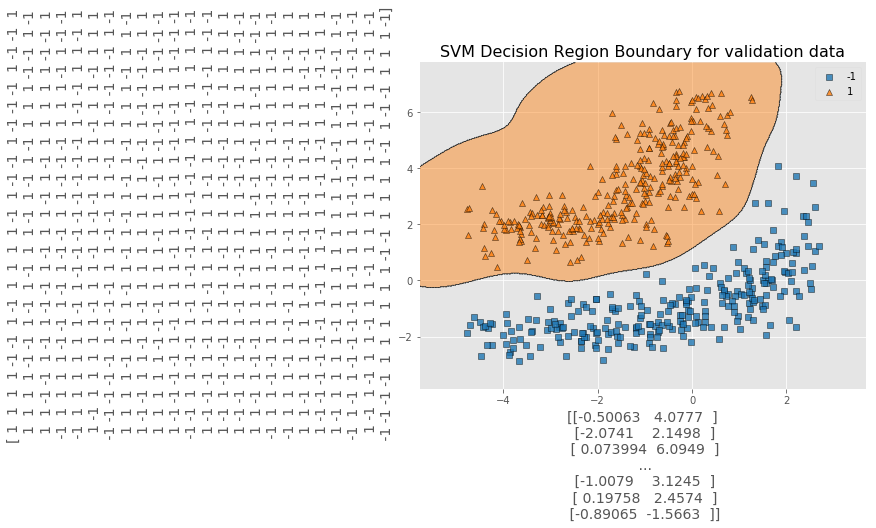

In [546]:
from mlxtend.plotting import plot_decision_regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(8,6))



plot_decision_regions(X=X_val, 
                      y=y_val,
                      clf=final_clf)




# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X_val, size=14)
plt.ylabel(y_val, size=14)
plt.title('SVM Decision Region Boundary for validation data', size=16)
plt.savefig('validation_best_result.png')

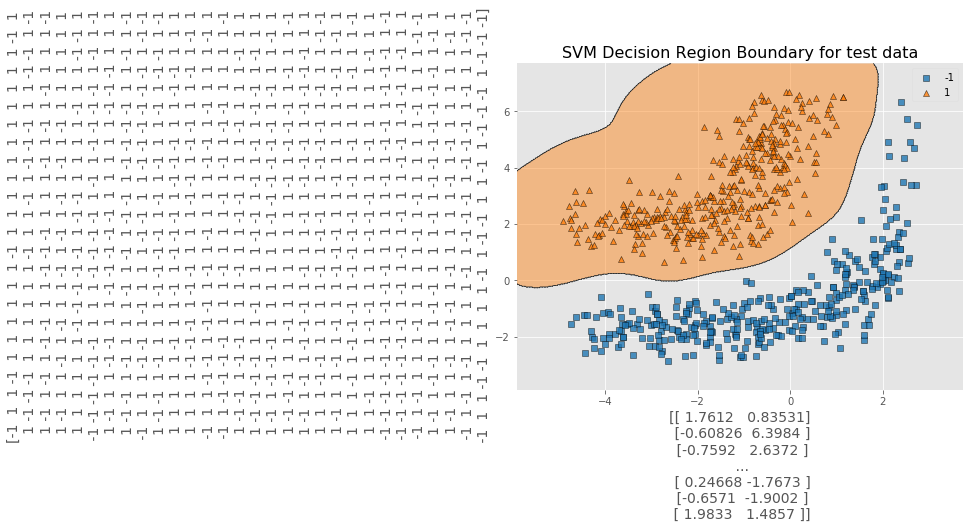

In [547]:
from mlxtend.plotting import plot_decision_regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(8, 6))



plot_decision_regions(X=X_test, 
                      y=y_test,
                      clf=final_clf)




# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X_test, size=14)
plt.ylabel(y_test, size=14)
plt.title('SVM Decision Region Boundary for test data', size=16)
plt.savefig('test_best_result.png')

C:\Users\AVAJANG-PC\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


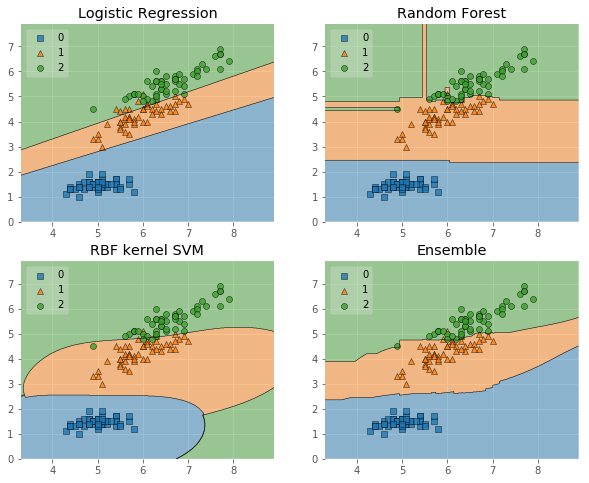

In [462]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3],
                              weights=[2, 1, 1], voting='soft')

# Loading some example data
X, y = iris_data()
X = X[:,[0, 2]]

# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['Logistic Regression',
          'Random Forest',
          'RBF kernel SVM',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

numpy.ndarray